
## Experiment 2
The goal of this project is to query the Northwinds database to get the data needed to perform FOUR statistical analyses and hypothesis tests to generate analytical insights that can be of value to the company.


#### Experiment 2 - Which regions had the biggest orders and the most sales?

In [1]:
# Or how does Total Quantity compare to Freight and Customers?

In [1]:
# Import libraries
import pandas as pd
import sqlite3
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from statsmodels.stats.power import  tt_ind_solve_power
import scipy.stats as stats

In [2]:
# Join the Order and OrderDetail Tables

In [3]:
# Load connection and cursor
conn = sqlite3.connect('Northwind_small.sqlite')
cur = conn.cursor()

# Join some of the tables
cur.execute("""SELECT CustomerId, ShipRegion, Freight, Quantity, UnitPrice, Discount 
               FROM OrderDetail
               JOIN "Order"
               ;""")
df2 = pd.DataFrame(cur.fetchall())
df2.columns = [x[0] for x in cur.description]
print(len(df2))
df2.head(5)

1788650


,CustomerId,ShipRegion,Freight,Quantity,UnitPrice,Discount
0,VINET,Western Europe,32.38,12,14.0,0.0
1,TOMSP,Western Europe,11.61,12,14.0,0.0
2,HANAR,South America,65.83,12,14.0,0.0
3,VICTE,Western Europe,41.34,12,14.0,0.0
4,SUPRD,Western Europe,51.30,12,14.0,0.0


In [4]:
df2.ShipRegion.value_counts()

Western Europe     594780
North America      327560
South America      312475
British Isles      161625
Southern Europe    137920
Northern Europe    118525
Scandinavia         60340
Central America     60340
Eastern Europe      15085
Name: ShipRegion, dtype: int64

In [33]:
# Looks like Western Europe accounts for a lot of the sales - and there are 9 regions

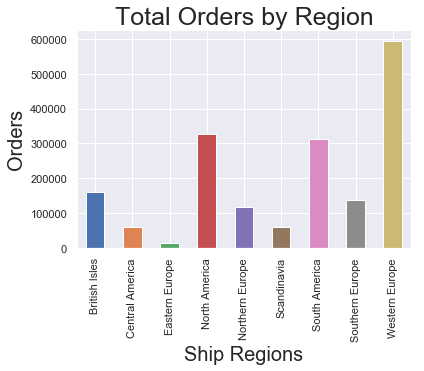

In [34]:
df2.groupby('ShipRegion').size().plot(kind='bar')
plt.ylabel("Orders",fontsize=20)
plt.xlabel("Ship Regions", fontsize=20)
plt.title('Total Orders by Region', fontsize=25)
plt.show()
plt.show()

In [35]:
# How does each region do in terms of actual sales

In [5]:
# Create a new column called DiscountedSale to look at Quantity, UnitPrice, and Discount
df2['DiscountedSale'] = df2.apply(lambda row: (row['Quantity']*row['UnitPrice']*(1 - row['Discount'])
                                                if row['Discount'] > 0
                                                else row['Quantity']*row['UnitPrice']), axis=1)
df2.head()

,CustomerId,ShipRegion,Freight,Quantity,UnitPrice,Discount,DiscountedSale
0,VINET,Western Europe,32.38,12,14.0,0.0,168.0
1,TOMSP,Western Europe,11.61,12,14.0,0.0,168.0
2,HANAR,South America,65.83,12,14.0,0.0,168.0
3,VICTE,Western Europe,41.34,12,14.0,0.0,168.0
4,SUPRD,Western Europe,51.30,12,14.0,0.0,168.0


In [6]:
# Check a couple rows with discounts to see if it worked

In [7]:
# Check a couple rows with discounts to see if it worked
df2.iloc[6640:6641]

,CustomerId,ShipRegion,Freight,Quantity,UnitPrice,Discount,DiscountedSale
6640,VINET,Western Europe,32.38,6,16.8,0.05,95.76


In [8]:
df2.iloc[24070:24071]

,CustomerId,ShipRegion,Freight,Quantity,UnitPrice,Discount,DiscountedSale
24070,VINET,Western Europe,32.38,50,15.2,0.2,608.0


In [9]:
# Simplify the dataframe
df2 = df2.drop(['CustomerId', 'Freight', 'Quantity', 'UnitPrice', 'Discount'], axis=1)
df2.head()

,ShipRegion,DiscountedSale
0,Western Europe,168.0
1,Western Europe,168.0
2,South America,168.0
3,Western Europe,168.0
4,Western Europe,168.0


In [41]:
df2.tail()

,ShipRegion,DiscountedSale
1788645,Central America,26.0
1788646,Northern Europe,26.0
1788647,Western Europe,26.0
1788648,Western Europe,26.0
1788649,North America,26.0


In [13]:
df2.tail(15)

,ShipRegion,DiscountedSale
1788635,British Isles,26.0
1788636,North America,26.0
1788637,South America,26.0
1788638,North America,26.0
1788639,Western Europe,26.0
1788640,South America,26.0
1788641,Central America,26.0
1788642,Western Europe,26.0
1788643,South America,26.0
1788644,Western Europe,26.0


In [13]:
# Simplify dataframe to ShipRegion and Discounted Sales

In [52]:
# Anova not working with groupby
df2.groupby(['ShipRegion'])['DiscountedSale'].sum().reset_index()


,ShipRegion,DiscountedSale
0,British Isles,9.493448e+07
1,Central America,3.544221e+07
2,Eastern Europe,8.860551e+06
3,North America,1.924005e+08
4,Northern Europe,6.961862e+07
5,Scandinavia,3.544221e+07
6,South America,1.835400e+08
7,Southern Europe,8.101075e+07
8,Western Europe,3.493589e+08


In [10]:
df2.DiscountedSale.describe()

count    1.788650e+06
mean     5.873750e+02
std      9.689996e+02
min      4.800000e+00
25%      1.470000e+02
50%      3.377500e+02
75%      6.560000e+02
max      1.581000e+04
Name: DiscountedSale, dtype: float64

In [ ]:
349,000,000

In [21]:
3.49 * 100000000

349000000.0

In [15]:
# Graph the total sales by region

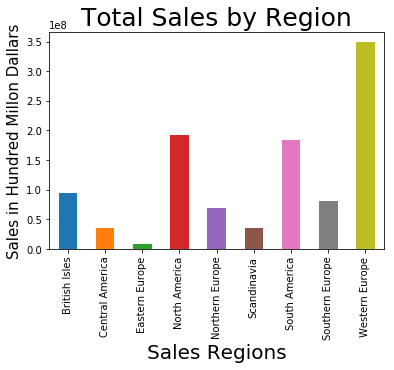

In [15]:
df2.groupby(['ShipRegion'])['DiscountedSale'].sum().plot(kind='bar')
plt.ylabel("Sales in Hundred Millon Dallars",fontsize=15)
plt.xlabel("Sales Regions", fontsize=20)
plt.title('Total Sales by Region', fontsize=25)
plt.show()

//anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Kernel Density Estimation')

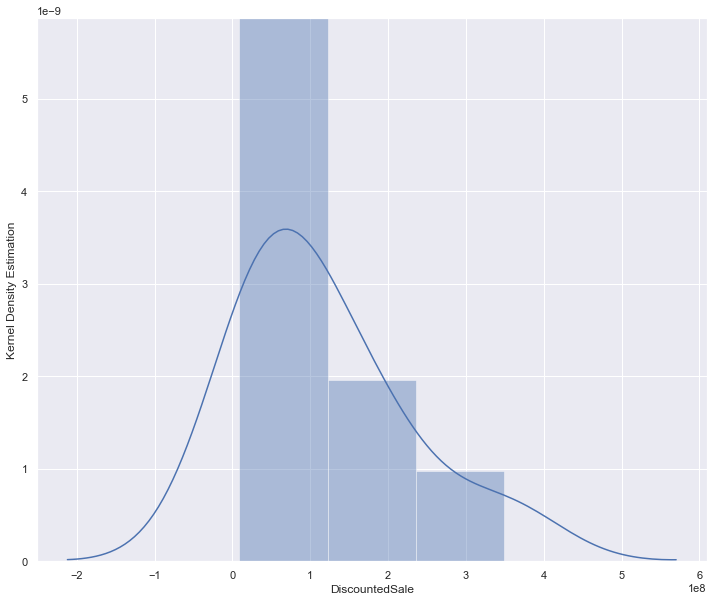

In [19]:
sns.set(color_codes=True);
sns.set(rc={'figure.figsize':(12,10)});
sns.distplot(df2.DiscountedSale, kde=True, norm_hist=False); # Red distribution
plt.ylabel("Kernel Density Estimation")

In [24]:
from matplotlib import pyplot
pyplot.hist(df2.DiscountedSale('British Isles'), bins=15, alpha=0.5, label='Without Discount')
#pyplot.hist(With_Discount.Quantity, bins=15, alpha=0.5, label='With Discount')
pyplot.legend(loc='upper right')
pyplot.ylabel("Count",fontsize=20)
pyplot.xlabel("Product Quantities Sold", fontsize=20)
pyplot.title('Quantity of Product Sold', fontsize=25)
pyplot.show()

TypeError: 'Series' object is not callable

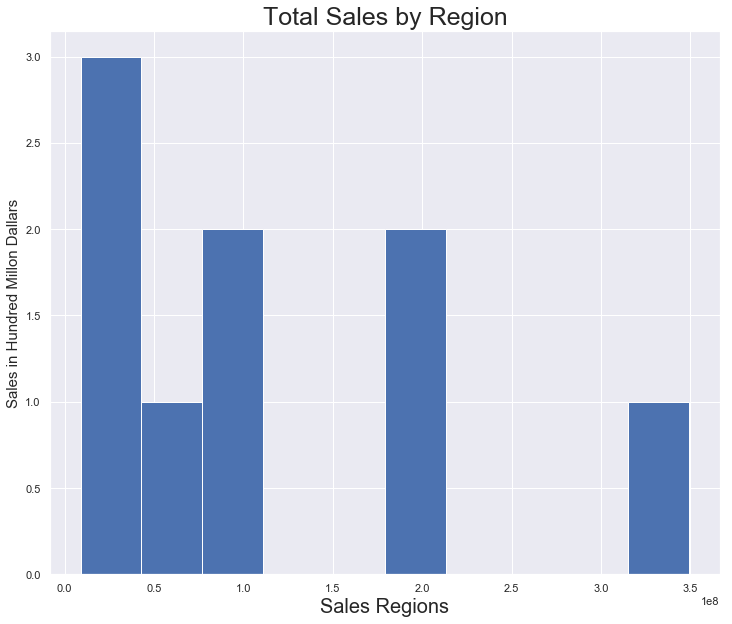

In [22]:
df2.groupby(['ShipRegion'])['DiscountedSale'].sum().plot(kind='hist')
plt.ylabel("Sales in Hundred Millon Dallars",fontsize=15)
plt.xlabel("Sales Regions", fontsize=20)
plt.title('Total Sales by Region', fontsize=25)
plt.show()

In [ ]:
df2log = df2.copy()
df2log['DiscountedSale'] = np.log(df2['DiscountedSale'])

In [ ]:

# Plotting the distributions
plt.figure(figsize=(8,5))
for region in set(df2.ShipRegion):
    region_group = df3_log.loc[df3_log['Region'] == region]
    sns.distplot(region_group['DiscountedSale'], hist_kws=dict(alpha=0.2), label=region)
    plt.legend()
    plt.xlabel('Revenue per order (log-transformed)')

//anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
//anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
//anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


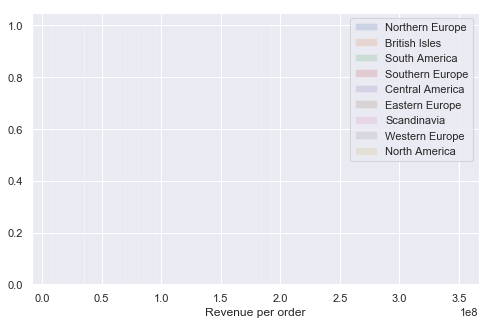

In [26]:
# Plotting the distributions
plt.figure(figsize=(8,5))
for region in set(df2.ShipRegion):
    region_group = df2.loc[df2['ShipRegion'] == region]
    sns.distplot(region_group['DiscountedSale'], hist_kws=dict(alpha=0.2), label=region)
    plt.legend()
    plt.xlabel('Revenue per order');

In [10]:
N_Europe = df2[df2['ShipRegion'] == "Northern Europe"]
print(N_Europe.describe())
N_Europe.tail()

       DiscountedSale
count   118525.000000
mean       587.374960
std        969.003419
min          4.800000
25%        147.000000
50%        337.750000
75%        656.000000
max      15810.000000


,ShipRegion,DiscountedSale
1788565,Northern Europe,26.0
1788566,Northern Europe,26.0
1788573,Northern Europe,26.0
1788622,Northern Europe,26.0
1788646,Northern Europe,26.0


In [11]:
N_Europe = df2[df2['ShipRegion'] == "British Isles"]
print(N_Europe.describe())
N_Europe.tail()

       DiscountedSale
count   161625.000000
mean       587.374960
std        969.002329
min          4.800000
25%        147.000000
50%        337.750000
75%        656.000000
max      15810.000000


,ShipRegion,DiscountedSale
1788596,British Isles,26.0
1788619,British Isles,26.0
1788628,British Isles,26.0
1788629,British Isles,26.0
1788635,British Isles,26.0


In [49]:
N_Europe = df2[df2['ShipRegion'] == "Northern Europe"]
S_Europe = df2[df2['ShipRegion'] == "Southern Europe"]
W_Europe = df2[df2['ShipRegion'] == "Western Europe"]
S_America = df2[df2['ShipRegion'] == "South America"]
N_American = df2[df2['ShipRegion'] == "Nouth America"]
Britian = df2[df2['ShipRegion'] == "British Isles"]

In [ ]:
bigdata = pd.concat([data1, data2], ignore_index=True, sort =False)

In [51]:
formula = 'N_Europe ~ S_Europe'
lm = ols(formula, df2).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

PatsyError: categorical data cannot be >1-dimensional

In [46]:
df2.head()

,ShipRegion,DiscountedSale
0,Western Europe,168.0
1,Western Europe,168.0
2,South America,168.0
3,Western Europe,168.0
4,Western Europe,168.0


In [17]:
# Time to start my experiment!

## The Null Hypothesis, $H_0$
The Null Hypothesis for Experiment 2 is that ship region has no affect on total sales.

## The Alternative Hypothesis, $H_1$
The Alternative Hypothesis for Experiment 2 is that different regions have greater or lesser sales than others.

In [11]:
# Doesn't Work This Way!

#formula = 'C(ShipRegion) ~ DiscountedSale'
#lm = ols(formula, df2).fit()
#table = sm.stats.anova_lm(lm, typ=2)
#print(table)

ValueError: shapes (1788650,9) and (1788650,9) not aligned: 9 (dim 1) != 1788650 (dim 0)

In [53]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = 'DiscountedSale ~ C(ShipRegion)'
lm = ols(formula, df2).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                     sum_sq         df             F  PR(>F)
C(ShipRegion)  2.848638e-14        8.0  3.792260e-21     1.0
Residual       1.679470e+12  1788641.0           NaN     NaN


In [54]:
# Anova not working with groupby
df2.groupby(['ShipRegion'])['DiscountedSale'].count().reset_index()

,ShipRegion,DiscountedSale
0,British Isles,161625
1,Central America,60340
2,Eastern Europe,15085
3,North America,327560
4,Northern Europe,118525
5,Scandinavia,60340
6,South America,312475
7,Southern Europe,137920
8,Western Europe,594780


In [55]:
formula = 'DiscountedSale ~ C(ShipRegion)'
lm = ols(formula, df2).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                     sum_sq         df             F  PR(>F)
C(ShipRegion)  2.848638e-14        8.0  3.792260e-21     1.0
Residual       1.679470e+12  1788641.0           NaN     NaN


In [ ]:
# Extra

In [ ]:
# A different way to calculate total sales without the discount

In [ ]:
df2['TotalSales'] = df2.apply(lambda row: row.Quantity * row.UnitPrice, axis = 1)
df2.head()

In [ ]:
# Just looking at Total Quantity purchased

In [ ]:
df2_Quantity = df2.groupby(['ShipRegion'])['Quantity'].sum().reset_index()
df2_Quantity`

In [ ]:
# Turn value_count of Orders into new df with Total Orders column

In [ ]:
value_counts = df2['ShipRegion'].value_counts()
df2_Orders = pd.DataFrame(value_counts)
df2_Orders = df2_Orders.reset_index()
df2_Orders.columns = ['ShipRegion', 'Total Orders']
df2_Orders

In [ ]:
# Merge Total Orders and Total Discounted Sales

In [ ]:
df2_New = pd.merge(df2_Orders, df2, on='ShipRegion')
df2_New

In [ ]:
# Create new column to find Total Sale per Order

In [ ]:
df2_New['SalesPerOrder'] = df2_New.apply(lambda row: row.DiscountedSale / row['Total Orders'] , axis = 1)
df2_New.head()

In [ ]:
# I figured out another way to clean up the dataframe
#df2.drop(['CustomerId', 'Freight', 'Quantity', 'UnitPrice', 'Discount'], axis=1, inplace=True)

In [ ]:
# Look at average price per region - not sure if this is working

In [ ]:
region_sales = df2.groupby('ShipRegion').agg({'DiscountedSale': ['mean', 'min', 'max']})
region_sales.head()